<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
Holds the information from the outside word that is going to be computed for the network 
### Hidden Layer:
It's a layer that between the input layer and the output layer. This layer or layers perfom computations with a set of weighted inputs and give an output throus an activation fuction. They transfer this information from the input to the utput. 
### Output Layer: 
It's the last layer and basically this layer produces the end result, taking as an input the results the hidden layers and applying an activation fuction.
### Neuron:
A neuron is a set of inputs, weight and an activation fuction. this neuron is the responsible to translate all these information into a single output. 
### Weight:
is the strength of the connectio. If the wiight is close to zero then means that cha ging the input will not change the output. Negative weights mean increasing this input will decrease the output.A set of weighted inputs allows each artificial neuron or node in the system to produce related outputs.
### Activation Function:
It's a function that delivers an output based on inputs or is set of the transfer function used to get desired output. 
Most popular activations functions are : 
Relu:
f(x) = max(0, x)
Sigmoid:
σ(x) = 1 / (1 + exp(−x))
Tanh:
tanh(x) = 2σ(2x) − 1
Without an activation function, a neural network would just be a basic linear regression model
### Node Map:
https://www.asimovinstitute.org/neural-network-zoo/
https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png

### Perceptron:
Perceptron is a linear classifier (binary). that has Two input units and one output units with no hidden layers.
The perceptron consists of 4 parts.
1. Input values or One input layer
2. Weights and Bias
3. Net sum
4. Activation Function


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

A neural nertwork is composed for layers of computational units called neurons. This neurons are arramge in layers (Input, hidden and output). 

In the first layer, the neural network takes information from the outside world called inputs, and represented this information into the values between 0(inactive) to 1(active), this layer just pass the information from the outside to the hidden layer. 

The second is called the hidden layer, in which a neuron takes these inputs and multiply them by some weight, sum these results and adjusted the result values with a bias value.This final value is fed into the activation functio which compress a neuron’s value into a smaller range. The compressed value is then passed onto the next neuron.
A neural network can have zero or multiple hidden layers in which this process is performed again an again. 

Finally the output layer, It contains the final values or output values.

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [3]:
##### Your Code Here #####

df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [91]:
import numpy as np

In [92]:
inputs = np.array(df)

In [93]:
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [94]:
correct_outputs = [[1],[1],[1],[0]]

In [95]:
correct_outputs

[[1], [1], [1], [0]]

In [96]:
weights = 2 * np.random.random((3,1))-1

In [97]:
weights

array([[ 0.82049593],
       [-0.17003471],
       [-0.05789913]])

In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivate (x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [101]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
def perceptron_luna(inputs, weights, correct_outputs):
        for iteration in range(10000):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(inputs, weights)

            # Activate!
            activated_output = sigmoid(weighted_sum)

            # Cac error
            error = correct_outputs - activated_output

            adjustments = error * sigmoid_derivate(activated_output)

            # Update the Weights
            weights += np.dot(inputs.T, adjustments)

        print("Weights after training")
        print(weights)

        print("Output after training")
        print(activated_output)

In [102]:
perceptron_luna(inputs, weights, correct_outputs)

Weights after training
[[-3.80317859]
 [-3.81042509]
 [11.6965363 ]]
Output after training
[[9.99991676e-01]
 [9.99626888e-01]
 [9.99624175e-01]
 [4.93495004e-04]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [103]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [149]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [106]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]


In [107]:
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [150]:
y = diabetes['Outcome'].values.astype(np.float)


In [151]:
scaler = MinMaxScaler()
X = scaler.fit_transform(diabetes[feats]).astype(np.float)


In [152]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [176]:
##### Update this Class #####

class Perceptron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [177]:
import matplotlib.pyplot as plt

In [171]:

# train/test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

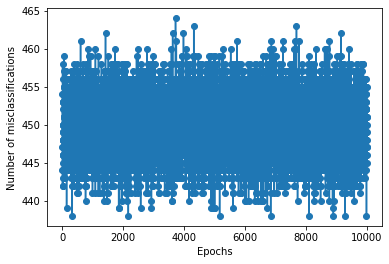

In [172]:

pn = Perceptron(0.1, 10000)
pn.fit(X_train, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [173]:
predictions = [pn.predict(X_test[i]) for i in range(len(X_test))]
print("accuracy:", accuracy_score(y_test, predictions))


accuracy: 0.35714285714285715


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?